In [40]:
import pickle
import os
from typing import List, Dict, Tuple

EXP_DS = 'cifar10_rand_d20_CK10'
EXPERIMENTS = []
for day in os.listdir('outputs'):
    if day.startswith('.'):
        continue
    for exp in os.listdir(os.path.join('outputs', day)):
        if exp.startswith('.'):
            continue
        if 'results.pkl' in os.listdir(os.path.join('outputs', day, exp, EXP_DS)):
            EXPERIMENTS.append('{}/{}'.format(day, exp))

data = []
results: Dict[str, Tuple[int, List[float], List[float]]] = {}
for exp in EXPERIMENTS:
    file_path = 'outputs/{}/{}/results.pkl'.format(exp, EXP_DS)
    with open(file_path, 'rb') as file:
        data.append(pickle.load(file))
    latest_acc = [tup[1] for tup in data[-1]['history'].metrics_centralized['accuracy']]
    latest_loss = [tup[1] for tup in data[-1]['history'].losses_centralized]
    results[exp] = (len(latest_acc), latest_acc, latest_loss)

print(results)

{'2025-03-04/11-08-51': (11, [0.09969999641180038, 0.26669999957084656, 0.5016000270843506, 0.578000009059906, 0.6353999972343445, 0.6491000056266785, 0.6754000186920166, 0.6801999807357788, 0.6887000203132629, 0.7008000016212463, 0.7062000036239624], [2.3016581535339355, 2.0692574977874756, 1.3297131061553955, 1.1708977222442627, 1.0006204843521118, 0.9751806855201721, 0.9107710719108582, 0.8958850502967834, 0.871143639087677, 0.8373029232025146, 0.8260374069213867])}


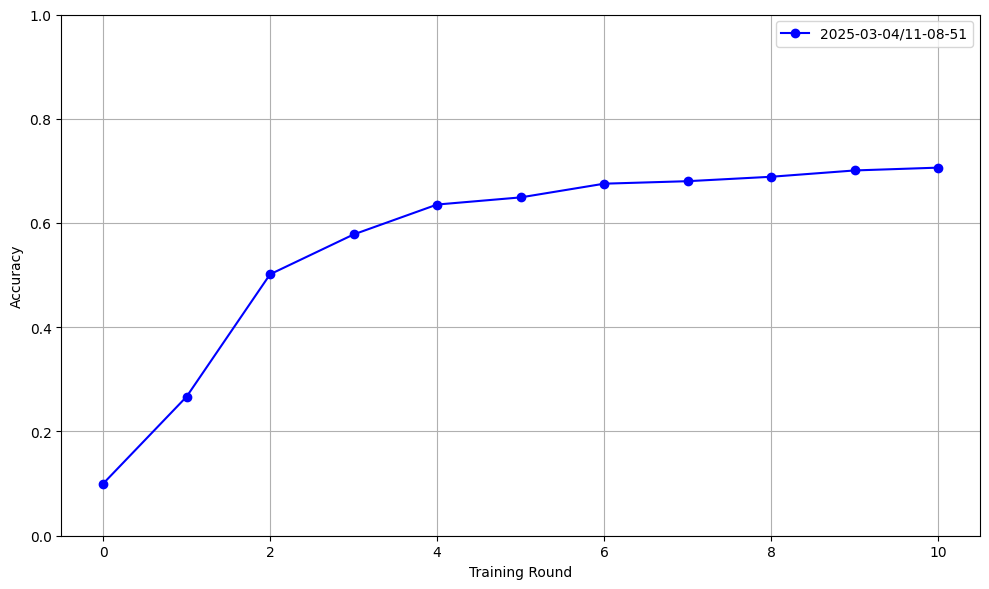

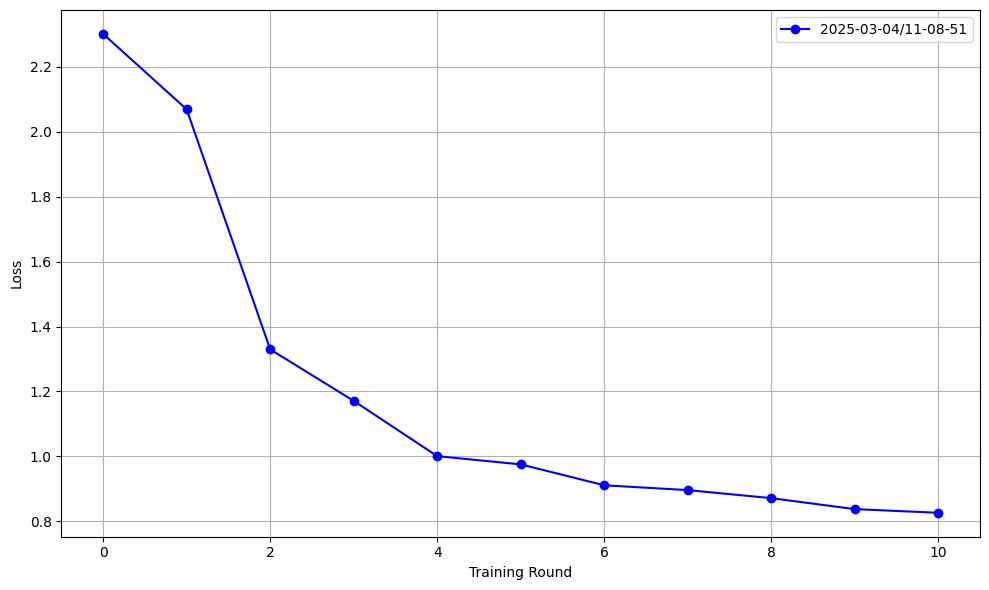

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for exp in EXPERIMENTS:
    plt.plot(range(results[exp][0]), results[exp][1], marker='o', color='b', label=exp)

plt.xlabel('Training Round')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('plot_accuracy.png', format='png')
plt.show()

plt.figure(figsize=(10, 6))
for exp in EXPERIMENTS:
    plt.plot(range(results[exp][0]), results[exp][2], marker='o', color='b', label=exp)

plt.xlabel('Training Round')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('plot_loss.png', format='png')
plt.show()